In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
filename = "sensor.csv"
data = read_csv(filename)


In [2]:
data.head(10)

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0  78     61    0.0022   -0.0004       100  518.67  641.79  1588.09  1396.71   
1  78     62    0.0019   -0.0005       100  518.67  642.01  1579.61  1403.44   
2  78     63   -0.0012   -0.0005       100  518.67  641.76  1591.07  1399.13   
3  78     64   -0.0009   -0.0001       100  518.67  642.09  1579.69  1397.25   
4  78     65    0.0007    0.0004       100  518.67  642.49  1581.95  1394.86   
5  78     66   -0.0048    0.0001       100  518.67  641.69  1586.59  1399.64   
6  78     67    0.0039   -0.0005       100  518.67  642.10  1583.62  1393.91   
7  78     68    0.0021    0.0000       100  518.67  642.18  1586.33  1399.83   
8  78     69    0.0021   -0.0002       100  518.67  641.81  1586.41  1389.95   
9  78     70    0.0005    0.0001       100  518.67  642.05  1585.08  1391.43   

      s5  ...      s13      s14     s15   s16  s17   s18  s19    s20     s21  \
0  14.62  ...  2388.01  8143.45  84.101  0.03  391  2388  100  39.06  23.425   
1  14.62  ...  2387.97  8130.33  83.981  0.03  390  2388  100  39.01  23.296   
2  14.62  ...  2388.01  8137.87  83.804  0.03  391  2388  100  39.00  23.476   
3  14.62  ...  2388.02  8143.26  83.824  0.03  391  2388  100  39.02  23.527   
4  14.62  ...  2387.98  8138.39  83.967  0.03  392  2388  100  39.18  23.345   
5  14.62  ...  2388.01  8139.06  84.035  0.03  391  2388  100  39.02  23.491   
6  14.62  ...  2387.96  8141.37  83.868  0.03  391  2388  100  39.00  23.501   
7  14.62  ...  2388.02  8139.98  83.729  0.03  390  2388  100  39.16  23.328   
8  14.62  ...  2388.03  8140.60  83.898  0.03  392  2388  100  39.19  23.470   
9  14.62  ...  2388.00  8141.42  84.081  0.03  391  2388  100  38.93  23.491   

   ttf  
0  170  
1  169  
2  168  
3  167  
4  166  
5  165  
6  164  
7  163  
8  162  
9  161  

[10 rows x 27 columns]

In [3]:
data.shape

(5048, 27)

Veri setinde 5048 gözlem, 27 değişken bulunmakta.

In [4]:
data.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3      int64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19           int64
s20         float64
s21         float64
ttf           int64
dtype: object

Sürekli bir veri seti.

In [5]:
data.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
ttf         0
dtype: int64

Kayıp veri bulunmamakta.

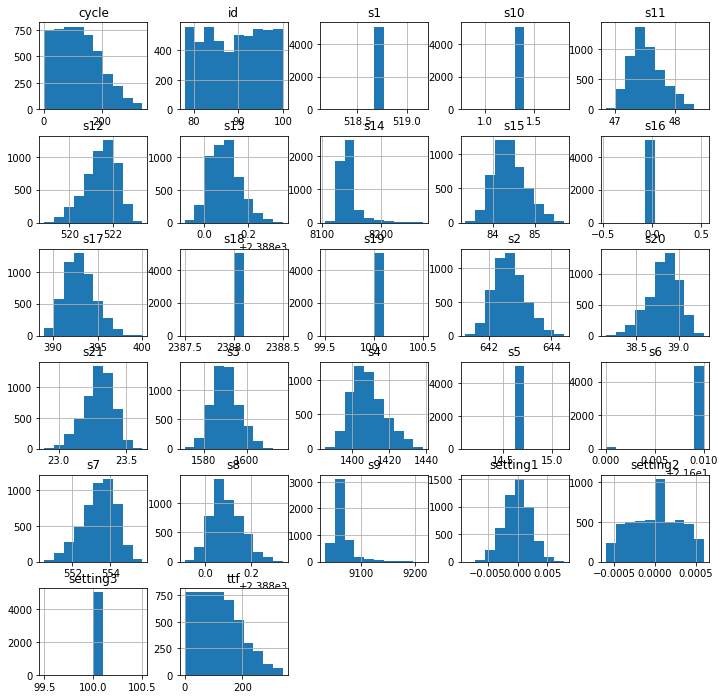

In [6]:
data.hist(figsize = (12,12), rwidth = 1)
plt.show()

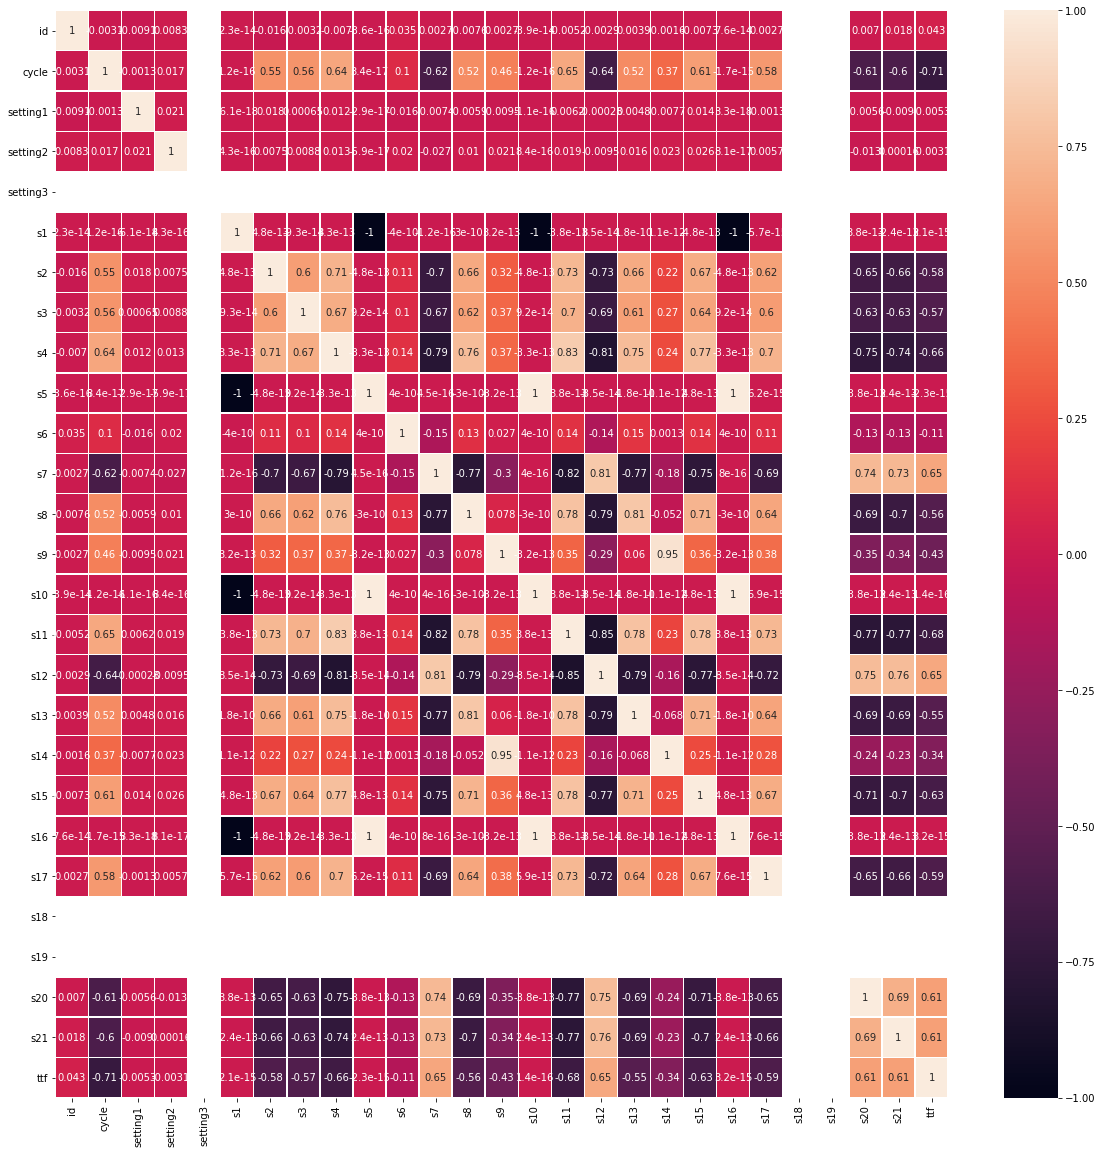

In [7]:
j = data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(j, annot = True, linewidths = .5, ax = ax)

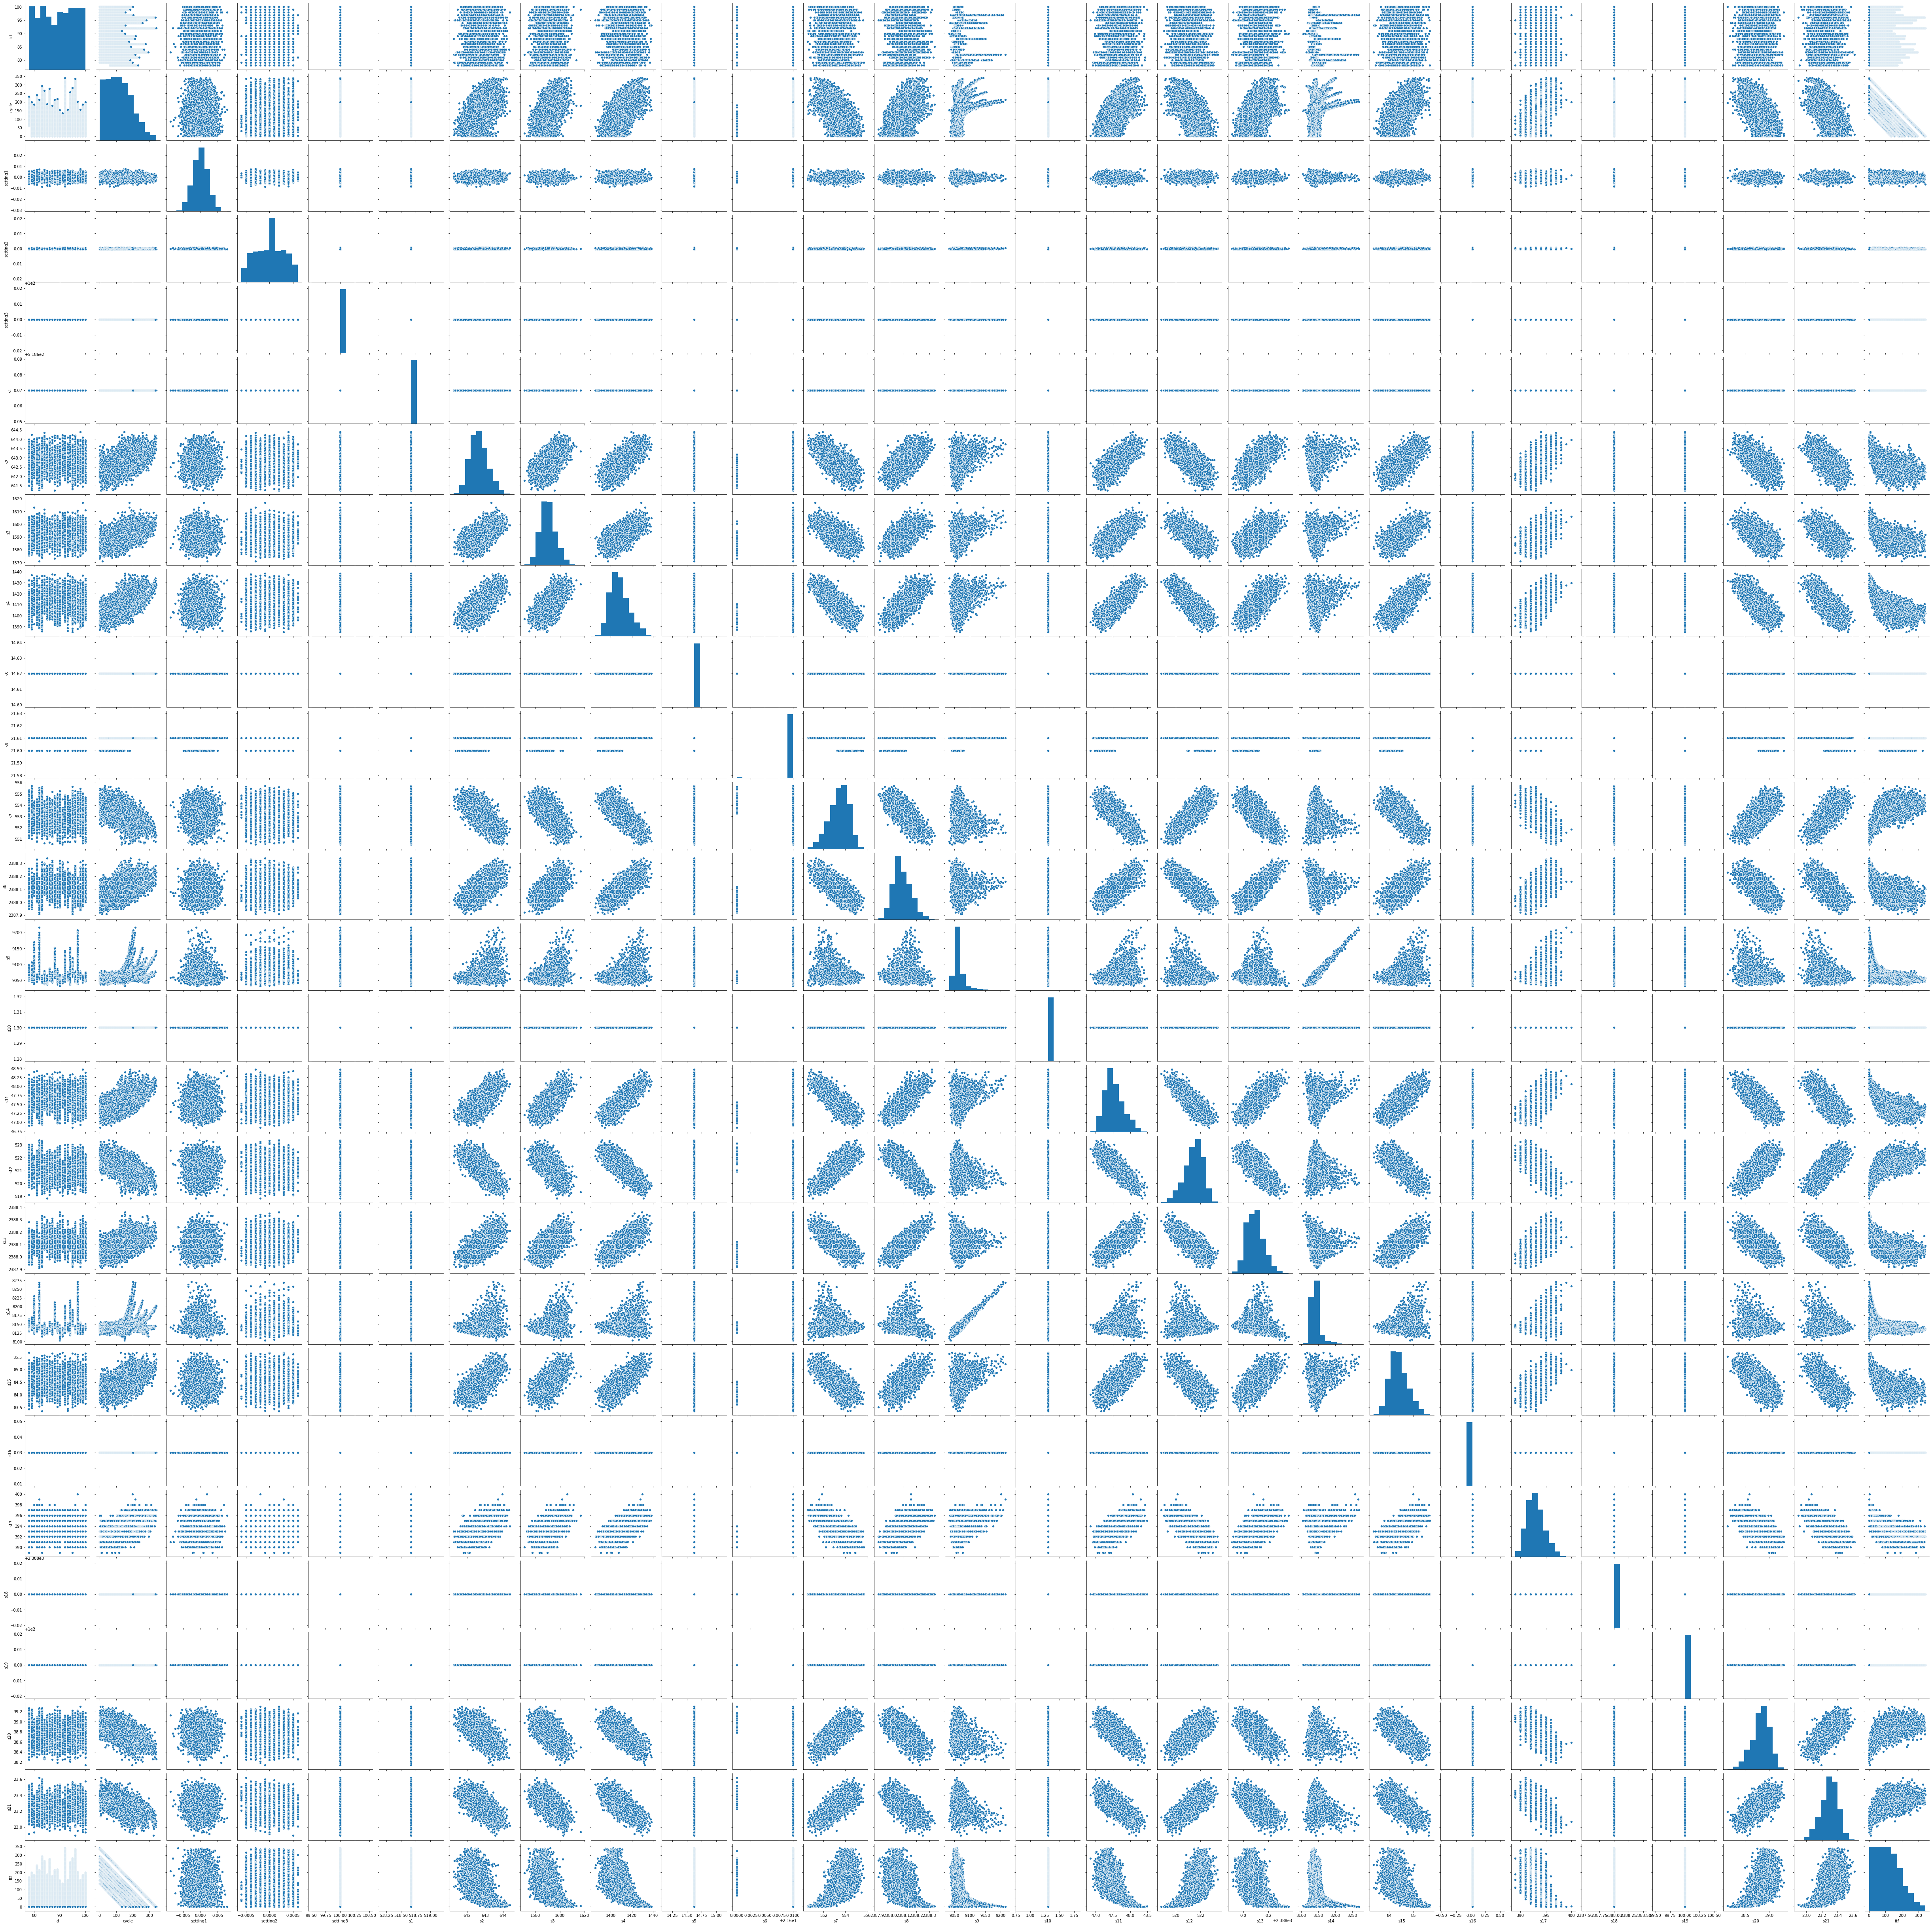

In [8]:
sns.pairplot(data)

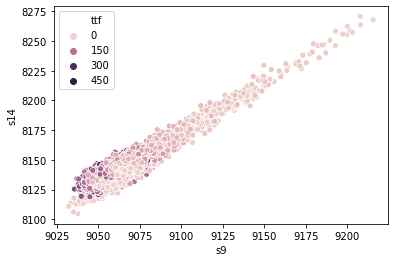

In [9]:
ax = sns.scatterplot(x= "s9", y= "s14", hue= "ttf",data=data)

Korelasyon oranı 1'e en yakın olan 2 değişkenin arasındaki ilişkiyi görselleştirdim.

                                            MODELLEME

In [10]:
X = data.drop(["ttf"], axis = 1) #"Girdi.
Y = data["ttf"] #ttf çıktı değişkeni olarak atandı.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler  #Verinin normalize edilmesi
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

                                        LİNEAR REGRESYON MODELİ

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model1 = lr.fit(x_train_std, y_train)
test_tahmin = model1.predict(x_test_std)
eğitim_tahmin = model1.predict(x_train_std)

In [14]:
print("Doğrusal model sabit: {}" .format(lr.intercept_))# Kullanılan _ işareti eğitim verisinin kullanılacağını belirtir.
print("Doğrusal model katsayılar (w): {}" .format(lr.coef_))
#Performans ölçümü
print("R-kare (eğitim): {:.3f}" .format(lr.score(x_train_std, y_train.values.ravel())))
print("R-kare (test): {:.3f}" .format(lr.score(x_test_std, y_test.values.ravel())))

Doğrusal model sabit: 116.25417492215819
Doğrusal model katsayılar (w): [ 2.99944979e+00 -2.67057819e+01  2.62868028e-01  5.31459801e-01
  1.77635684e-15  2.66453526e-15 -2.40565489e+00 -3.52573606e+00
 -4.01133879e+00  4.44089210e-16 -9.16007834e-01  6.27559441e+00
  6.57374073e-02 -3.06661120e+00 -1.11022302e-16 -6.76966369e+00
  4.39788512e+00 -1.15704328e+00 -5.05422020e+00 -5.10353357e+00
  0.00000000e+00 -1.18084070e+00  0.00000000e+00  0.00000000e+00
  5.45120905e-01  2.88087727e+00]
R-kare (eğitim): 0.613
R-kare (test): 0.600


In [15]:
print("Eğitim verisi için Ortalama Hata Kare (MSE): %.3f " % mean_squared_error(eğitim_tahmin, y_train))
print("Test verisi için Ortalama Hata Kare (MSE):   %.3f " % mean_squared_error(test_tahmin, y_test))

Eğitim verisi için Ortalama Hata Kare (MSE): 2218.568 
Test verisi için Ortalama Hata Kare (MSE):   2299.019 


                                        KARAR AĞAÇLARI REGRESYON MODELİ

In [16]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor
KAR = dtr(max_leaf_nodes = 30, random_state = 0, max_depth = 10)
KAR.fit(x_train, y_train)

pred_train = KAR.predict(x_train)
pred_test = KAR.predict(x_test)

print("R-kare eğitim: %.4f" % r2_score(y_train, pred_train))
print("R-kare test: %.4f \n" % r2_score(y_test, pred_test))
print("MSE-eğitim: %.3f" % mean_squared_error(y_train,pred_train))
print("MSE-test: %.3f" % mean_squared_error(y_test, pred_test))

R-kare eğitim: 0.8236
R-kare test: 0.7806 

MSE-eğitim: 1011.132
MSE-test: 1261.304


Karar Ağaçları Regresyon Modeli için Parametre Optimizasyonu

In [17]:
model1 = DecisionTreeRegressor()
parameters1 = {"max_leaf_nodes": [1, 2, 5, 10, 20, 30, 40, 50, 60],
              "min_samples_leaf": [1, 2, 4, 5, 6, 7, 8, 10, 20],
              "min_samples_split": [1, 2, 3, 4, 5, 6, 7, 8, 10, 15]   
             }
grid1 = GridSearchCV(estimator = model1, param_grid = parameters1, cv = 10, verbose = 1, n_jobs = -1)
grid1.fit(x_train, y_train)
print("En iyi estimator:  ", grid1.best_estimator_)
print("En iyi skor: ", grid1.best_score_)
print("En iyi parametreler ", grid1.best_params_)

Fitting 10 folds for each of 810 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 4444 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5944 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 7644 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 8085 out of 8100 | elapsed:  2.6min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed:  2.6min finished


En iyi estimator:   DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=60,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
En iyi skor:  0.8779200075268235
En iyi parametreler  {'max_leaf_nodes': 60, 'min_samples_leaf': 1, 'min_samples_split': 4}


Parametre optimizasyonu sonrası öğrenme ve performans ölçümü

In [18]:
npred_test = grid1.predict(x_test)
npred_train = grid1.predict(x_train)

print("R-kare eğitim: %.4f" % r2_score(y_train, npred_train))
print("R-kare test: %.4f \n" % r2_score(y_test, npred_test))
print("MSE-eğitim: %.3f" % mean_squared_error(y_train,npred_train))
print("MSE-test: %.3f" % mean_squared_error(y_test, npred_test))

R-kare eğitim: 0.9174
R-kare test: 0.8834 

MSE-eğitim: 473.530
MSE-test: 670.318


Parametre optimizasyonu sonucu modelin performansı iyileşti ve doğruluk oranları yükseldi.

                                        XGBOOST REGRESYON MODELİ

In [19]:
import xgboost

xgb = xgboost.XGBRegressor(objective = "reg:squarederror")
xgb.fit(x_train, y_train)

pre_train = xgb.predict(x_train)
pre_test = xgb.predict(x_test)

print("R-kare eğitim: %.4f" % r2_score(y_train, pre_train))
print("R-kare test: %.4f \n" % r2_score(y_test, pre_test))
print("MSE-eğitim: %.3f" % mean_squared_error(y_train,pre_train))
print("MSE-test: %.3f" % mean_squared_error(y_test, pre_test))

R-kare eğitim: 0.9691
R-kare test: 0.9603 

MSE-eğitim: 177.204
MSE-test: 228.500


XGBOOST Regresyon Modeli İçin Parametre Optimizasyonu

In [20]:
model2 = xgb
parameters = {"n_estimators": [50, 100, 200, 300, 400, 500],
              "learning_rate": [0.01, 0.1, 0.3, 0.5, 1, 2],
              "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 10, 15]   
             }
grid2 = GridSearchCV(estimator = model2, param_grid = parameters, cv = 10, verbose = 1, n_jobs = -1)
np.nan_to_num(X)
np.nan_to_num(Y)
grid2.fit(x_train, y_train)
print("En iyi estimator:  ", grid2.best_estimator_)
print("En iyi skor: ", grid2.best_score_)
print("En iyi parametreler ", grid2.best_params_)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 80.6min finished


En iyi estimator:   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
En iyi skor:  0.9950939537044989
En iyi parametreler  {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 500}


En iyi parametreler ile performans ölçümü

In [21]:
xpred_test = grid2.predict(x_test)
xpred_train = grid2.predict(x_train)

print("R-kare eğitim: %.4f" % r2_score(y_train, xpred_train))
print("R-kare test: %.4f \n" % r2_score(y_test, xpred_test))
print("MSE-eğitim: %.3f" % mean_squared_error(y_train, xpred_train))
print("MSE-test: %.3f" % mean_squared_error(y_test, xpred_test))

R-kare eğitim: 0.9986
R-kare test: 0.9963 

MSE-eğitim: 8.105
MSE-test: 21.538


Parametre optimizasyonu sonrası eğitim ve test başarısı çok yüksek çıktı ve aradaki fark çok az olduğu için aşırı öğrenme - ezberleme olmadığını da söyleyebiliriz.

                                RASTGELE ORMANLAR REGRESYON ALGORİTMASI

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(max_depth = 15, n_estimators = 100, min_samples_leaf = 10, min_samples_split = 10, random_state = 10)
rf_clf.fit(x_train, y_train)

pre_train = rf_clf.predict(x_train)
pre_test = rf_clf.predict(x_test)

print("R-kare eğitim: %.4f" % r2_score(y_train, pre_train))
print("R-kare test: %.4f" % r2_score(y_test, pre_test))
print("MSE-eğitim: %.3f" % mean_squared_error(y_train,pre_train))
print("MSE-test: %.3f" % mean_squared_error(y_test, pre_test))

R-kare eğitim: 0.9742
R-kare test: 0.9509
MSE-eğitim: 147.739
MSE-test: 282.193


Rastgele Ormanlar Algoritması için Parametre Optimizasyonu

In [23]:
model = rf_clf
parameters = {"n_estimators": [50, 100, 200, 300, 400, 500, 600, 800],
              "min_samples_split": [1, 2, 4, 6, 8, 10],
              "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20]   
             }
grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, verbose = 1, n_jobs = -1)

grid.fit(x_train, y_train)
print("En iyi estimator:  ", grid.best_estimator_)
print("En iyi skor: ", grid.best_score_)
print("En iyi parametreler ", grid.best_params_)

Fitting 10 folds for each of 528 candidates, totalling 5280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 71.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 104.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 129.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 161.8min
[Parallel(n_jobs=-1)]: Done 5280 out of 5280 | elapsed: 181.0min finished


En iyi estimator:   RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)
En iyi skor:  0.9443687237076915
En iyi parametreler  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 500}


Parametre optimizasyonu sonrası performans ölçümü

In [24]:
rpred_test = grid.predict(x_test)
rpred_train = grid.predict(x_train)

print("R-kare eğitim: %.4f" % r2_score(y_train, rpred_train))
print("R-kare test: %.4f \n" % r2_score(y_test, rpred_test))
print("MSE-eğitim: %.3f" % mean_squared_error(y_train, rpred_train))
print("MSE-test: %.3f" % mean_squared_error(y_test, rpred_test))

R-kare eğitim: 0.9732
R-kare test: 0.9487 

MSE-eğitim: 153.909
MSE-test: 294.875


                                                FEATURE SELECTION
                                                 FILTER METHOD

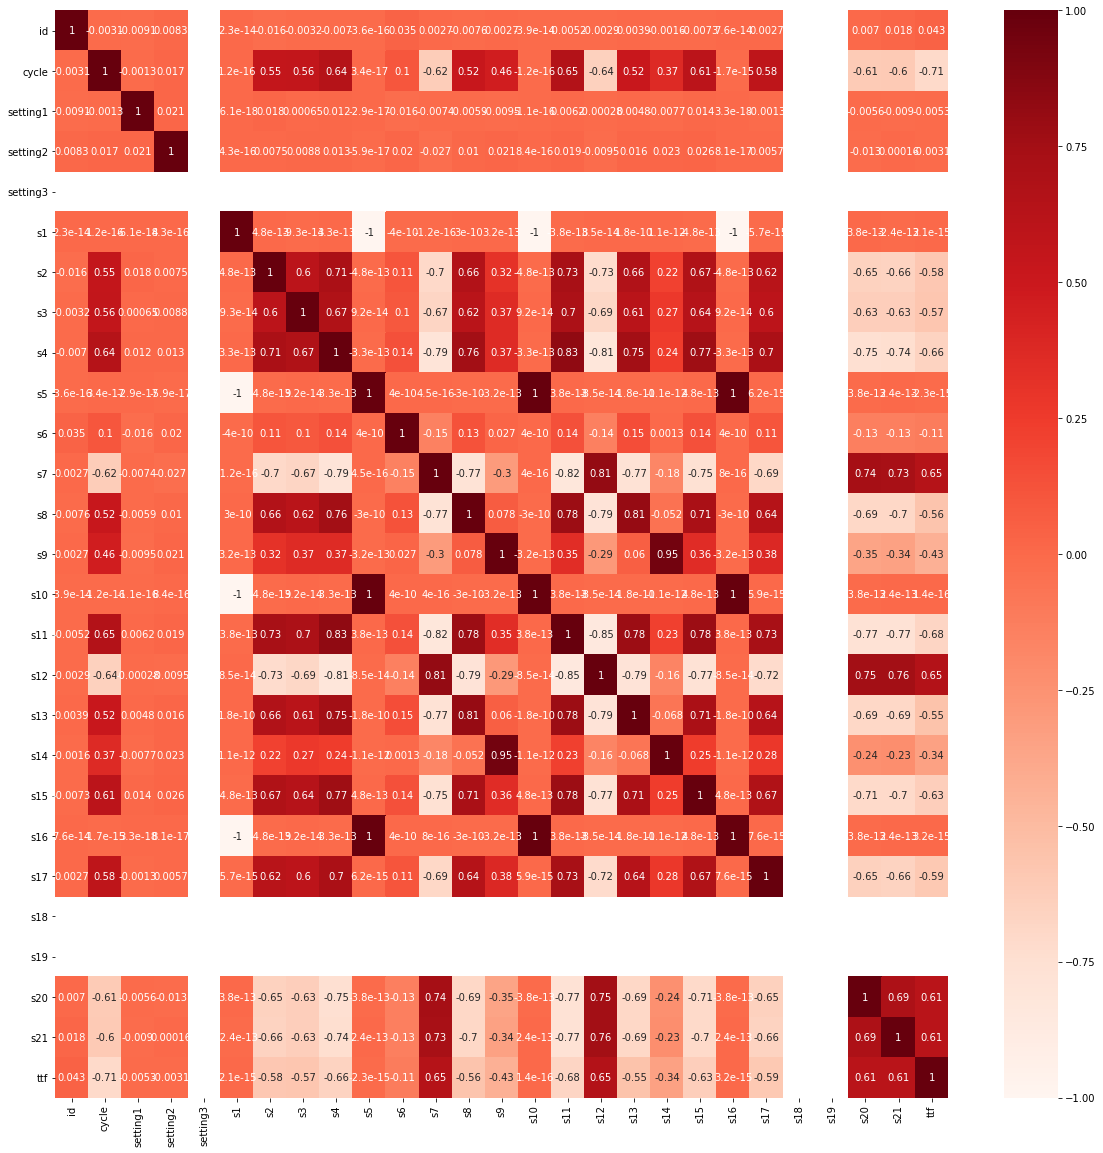

In [25]:
#Pearson Correlation
plt.figure(figsize = (20, 20))
cor = data.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [26]:
cor_target = abs(cor["ttf"])

rel_feat = cor_target[cor_target > 0.6]
rel_feat

cycle    0.705261
s4       0.659622
s7       0.647886
s11      0.675709
s12      0.654989
s15      0.629885
s20      0.612295
s21      0.609596
ttf      1.000000
Name: ttf, dtype: float64

Korelasyonu 0.6 'dan yüksek olan değişkenler ile oluşturulan yeni girdiler.

In [27]:
xnew = data[["cycle","s4", "s7","s11", "s12","s15","s20", "s21"]] #Yeni girdi
ynew = data["ttf"]#Çıktı

In [28]:
xnew_train, xnew_test, ynew_train, ynew_test = train_test_split(xnew, ynew, test_size = 0.3, random_state = 0)

In [29]:
sc.fit(xnew_train)
xnew_train_std = sc.transform(xnew_train)
xnew_test_std = sc.transform(xnew_test)

Yeni model için Karar ağaçları ile performans ölçümü

In [30]:
nKAR = DecisionTreeRegressor(max_leaf_nodes = 30, random_state = 0, max_depth = 5)
nKAR.fit(xnew_train, ynew_train)

npred_train = nKAR.predict(xnew_train)
npred_test = nKAR.predict(xnew_test)

print("R-kare eğitim: %.4f" % r2_score(ynew_train, npred_train))
print("R-kare test: %.4f \n" % r2_score(ynew_test, npred_test))
print("MSE-eğitim: %.3f" % mean_squared_error(ynew_train,npred_train))
print("MSE-test: %.3f" % mean_squared_error(ynew_test, npred_test))

R-kare eğitim: 0.6723
R-kare test: 0.6164 

MSE-eğitim: 1878.727
MSE-test: 2205.797


Yeni model için Rastgele Ormanlar algoritması ile performans ölçümü

In [31]:
nrf_clf = RandomForestRegressor(max_depth = 15, n_estimators = 100, min_samples_leaf = 10, min_samples_split = 10, random_state = 10)
nrf_clf.fit(xnew_train, ynew_train)

pre_train = nrf_clf.predict(xnew_train)
pre_test = nrf_clf.predict(xnew_test)

print("R-kare eğitim: %.4f" % r2_score(ynew_train, pre_train))
print("R-kare test: %.4f" % r2_score(ynew_test, pre_test))
print("MSE-eğitim: %.3f" % mean_squared_error(ynew_train,pre_train))
print("MSE-test: %.3f" % mean_squared_error(ynew_test, pre_test))

R-kare eğitim: 0.7818
R-kare test: 0.6369
MSE-eğitim: 1251.068
MSE-test: 2087.643


Yeni model için XGBRegressor ile performans ölçümü

In [42]:
nxgb = xgboost.XGBRegressor(objective = "reg:squarederror")
nxgb.fit(xnew_train, ynew_train)

pre_train = nxgb.predict(xnew_train)
pre_test = nxgb.predict(xnew_test)

print("R-kare eğitim: %.4f" % r2_score(ynew_train, pre_train))
print("R-kare test: %.4f \n" % r2_score(ynew_test, pre_test))
print("MSE-eğitim: %.3f" % mean_squared_error(ynew_train,pre_train))
print("MSE-test: %.3f" % mean_squared_error(ynew_test, pre_test))

R-kare eğitim: 0.7225
R-kare test: 0.6387 

MSE-eğitim: 1590.933
MSE-test: 2077.503


Pearson korelasyon yöntemi ile korelasyon ilişkileri 0.6'dan yüksek olan değişkenlerden oluşan veri setinde doğruluk oranları azaldı.

                                    RECURSIVE FEATURE ELIMINATION
With DecisionTreeRegressor

In [33]:
model = DecisionTreeRegressor(max_leaf_nodes = 30, random_state = 0, max_depth = 5)

rfe = RFE(model, 7)
X_rfe = rfe.fit_transform(X, Y)

model.fit(X_rfe, Y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False False False  True False False False
 False  True False  True False False  True  True False False False False
 False False]
[ 1  1 12 10  9  8  3  7  1 14 16  4 20  1  6  1 11 13  1  1 15 17 18  5
  2 19]


In [34]:
#number of features
nof_list = np.arange(1, 27)
high_score = 0
#Variable to store the optimum features
nof = 0
score_list = []
for n in range (len(nof_list)):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
    model = DecisionTreeRegressor(max_leaf_nodes = 30, random_state = 0, max_depth = 5)
    rfe = RFE(model, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, Y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score > high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.711673


In [35]:
cols = list(X.columns)
rfe = RFE(model, 6)
model = DecisionTreeRegressor(max_leaf_nodes = 30, random_state = 0, max_depth = 5)
X_rfe = rfe.fit_transform(X, Y)
model.fit(X_rfe, Y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['id', 'cycle', 's4', 's9', 's11', 's15'], dtype='object')


Yukarıdaki 6 değişken ile çalışan Karar Ağaçları Regresyon modelinin başarı oranı %71'dir.

RFE with XGBRegressor

In [49]:
rxgb = xgboost.XGBRegressor(objective = "reg:squarederror")

rfe = RFE(rxgb, 7)
X_rfe = rfe.fit_transform(X, Y)

model.fit(X_rfe, Y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False False False False  True False False  True
 False  True False  True  True False False False False False False False
  True False]
[ 4  1 11 17 16 15  7  6  1 14 13  1 10  1 12  1  1  9  8  2 18  5 19 20
  1  3]


In [46]:
nof_list = np.arange(1, 27)
high_score = 0
#Variable to store the optimum features
nof = 0
score_list = []
for n in range (len(nof_list)):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
    rxgb = xgboost.XGBRegressor(objective = "reg:squarederror")
    rfe = RFE(rxgb, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, Y_train)
    X_test_rfe = rfe.transform(X_test)
    rxgb.fit(X_train_rfe, y_train)
    score = rxgb.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score > high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.962931


In [53]:
cols = list(X.columns)
rxgb = xgboost.XGBRegressor(objective = "reg:squarederror")
rfe = RFE(rxgb, 9)
X_rfe = rfe.fit_transform(X, Y)
rxgb.fit(X_rfe, Y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['cycle', 's4', 's7', 's9', 's11', 's12', 's15', 's20', 's21'], dtype='object')


Yukarıdaki 9 değişken ile çalışan XGBRegressor modelinin başarısı %96'dır.

                                    RFE with RandomForestRegressor

In [36]:
rf = RandomForestRegressor(max_depth = 15, n_estimators = 100, min_samples_leaf = 10, min_samples_split = 10, random_state = 10)

rfe = RFE(rf, 7)
X_rfe = rfe.fit_transform(X, Y)

rf.fit(X_rfe, Y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False False False  True False False False
 False  True False  True  True False  True False False False False False
 False False]
[ 1  1 10 12 18 17  7  9  1 14 13  3  6  1 15  1  1  4  1  2 16 11 19 20
  8  5]


In [37]:
#number of features
nof_list = np.arange(1, 27)
high_score = 0
#Variable to store the optimum features
nof = 0
score_list = []
for n in range (len(nof_list)):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
    rf = RandomForestRegressor(max_depth = 15, n_estimators = 100, min_samples_leaf = 10, min_samples_split = 10, random_state = 10)
    rfe = RFE(rf, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, Y_train)
    X_test_rfe = rfe.transform(X_test)
    rf.fit(X_train_rfe, y_train)
    score = rf.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score > high_score):
        if (score > 0.50) and (score < 0.98):
            high_score = score
            nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.970585


In [38]:
cols = list(X.columns)
rfe = RFE(rf, 3)
rf = RandomForestRegressor(max_depth = 15, n_estimators = 100, min_samples_leaf = 10, min_samples_split = 10, random_state = 10)
X_rfe = rfe.fit_transform(X, Y)
rf.fit(X_rfe, Y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['id', 'cycle', 's11'], dtype='object')


Yukarıdaki 3 girdi değişkeni ile çalışan Rastgele Ormanlar algoritmasının doğruluk oranı %97'dir.(Aslında model sadece 1 sensör için çalışmış oldu bir çok deneme yapmama rağmen rastgele ormanlar algoritması ile recursive feature elimination sonucunda bulabildiğim en iyi sonuç bu oldu.)

                                        MODELLERİ BİRLEŞTİRME

In [39]:
from sklearn.ensemble import VotingRegressor

In [40]:
final = VotingRegressor(estimators = [("RFR", rf_clf), ("DTR", KAR), ("XGBR", xgb)])

final.fit(x_train, y_train)
f_pred = final.predict(x_test)
f_train = final.predict(x_train)
print("Eğitim verisi için Doğruluk: %.3f " % r2_score(f_train , y_train))
print("Test verisi için Doğruluk: %.3f" % r2_score(f_pred, y_test))

Eğitim verisi için Doğruluk: 0.939 
Test verisi için Doğruluk: 0.912


In [41]:
print("MSE-eğitim: %.3f" % mean_squared_error(f_train,y_train))
print("MSE-test: %.3f" % mean_squared_error(f_pred, y_test))

MSE-eğitim: 291.956
MSE-test: 409.518


Modelde kullandığım 3 modelin birleşimi sonucu eğitim verisi için %93,9 doğruluk
                                                 test verisi için %91,2 doğruluk oranı elde edildi.
Genel olarak eğitim test doğruluğu birbirine yakın olduğu için aşırı öğrenme - ezberleme olmadığı ve başarılı bir model olduğu söylenebilir.